In [12]:

import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp, utils as ut
from pysar.simulation.plot import *

work_dir = '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR_IW1/AlcedoSenDT128'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]
out_file = '{}_networkInv_masking.jpg'.format(proj_name)

atr = readfile.read_attribute('timeseries.h5')
#geo_box = (-91.26, -0.3, -90.92, -0.62)
#coord = ut.coordinate(atr, lookup_file='geometryRadar.h5')
#pix_box = coord.bbox_geo2radar(geo_box)
#print('read data in pixel box (x0, y0, x1, y1): {}'.format(pix_box))

min_tcoh = 0.7
tcoh = []
tcoh.append(readfile.read('temporalCoherence_10conn.h5')[0])
tcoh.append(readfile.read('temporalCoherence_5conn.h5')[0])
tcoh.append(readfile.read('temporalCoherence_5conn_cohMask.h5')[0])
dem = readfile.read('../INPUTS/geometryRadar.h5', datasetName='height')[0]

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR_IW1/AlcedoSenDT128
reading height data from file: ../INPUTS/geometryRadar.h5 ...


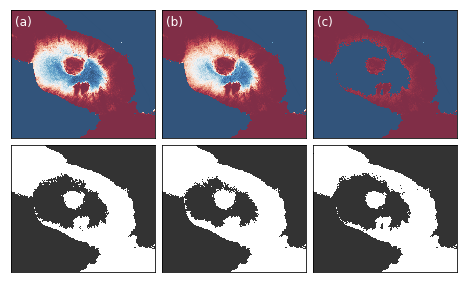

In [15]:
inps = pp.cmd_line_parse()
inps.disp_dem_contour = False

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[8, 6])
for i in range(len(tcoh)):
    pp.plot_dem_background(ax=ax[0, i], geo_box=None, dem=dem, inps=inps, print_msg=False)
    im = ax[0, i].imshow(tcoh[i], vmin=0., vmax=1., cmap='RdBu_r', alpha=0.8)
    ax[1, i].imshow(tcoh[i]>min_tcoh, vmin=0., vmax=1., cmap='gray', alpha=0.8)

num_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
ax_list = ax.flatten().tolist()
for i in range(len(ax_list)):
    axi = ax_list[i]
    pp.auto_flip_direction(atr, ax=axi, print_msg=False)
    axi.get_xaxis().set_ticks([])
    axi.get_yaxis().set_ticks([])
    axi.annotate(num_list[i], xy=(0.03, 0.88), color='w', xycoords='axes fraction', fontsize=font_size)
fig.subplots_adjust(wspace=0.05, hspace=-0.3)

plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()